In [33]:
import cv2, os
import numpy as np
from matplotlib import pyplot as plt
script_dir = os.getcwd() # Get the directory of the current script

In [34]:
def ipynb_cv_imshow(title, img, cv=True):
    """
    Display an image in a Jupyter Notebook cell.
    """
    if img is None:
        print("Image not found or could not be read.")
        return
    plt.figure(figsize=(10, 10))
    plt.title(title)
    if cv:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()

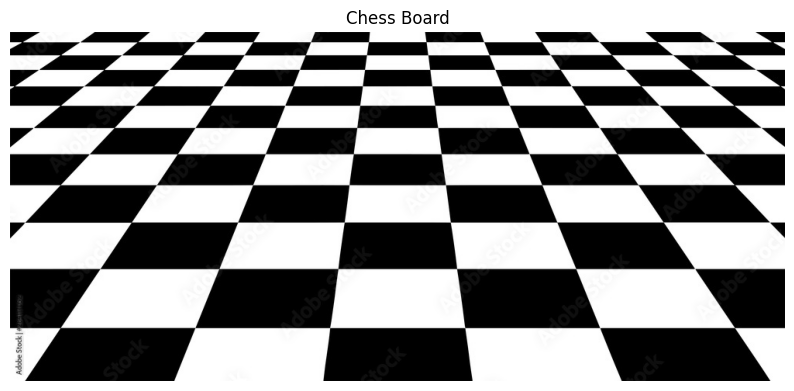

In [35]:
# locate the chess-board file
img = cv2.imread(os.path.join(script_dir, 'Chess_Board.jpg'))
ipynb_cv_imshow("Chess Board", img)

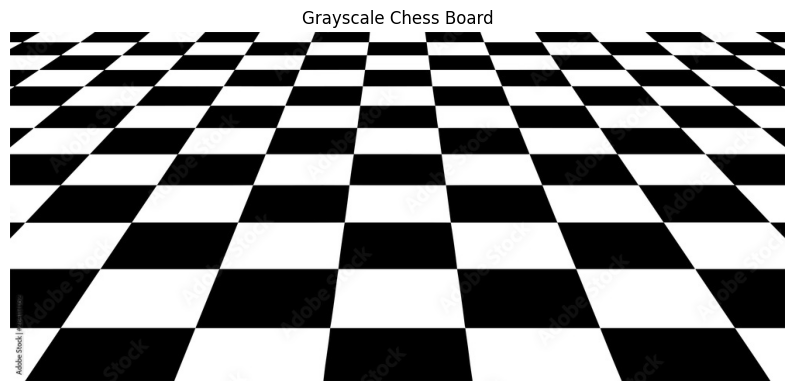

In [36]:
# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ipynb_cv_imshow("Grayscale Chess Board", gray)

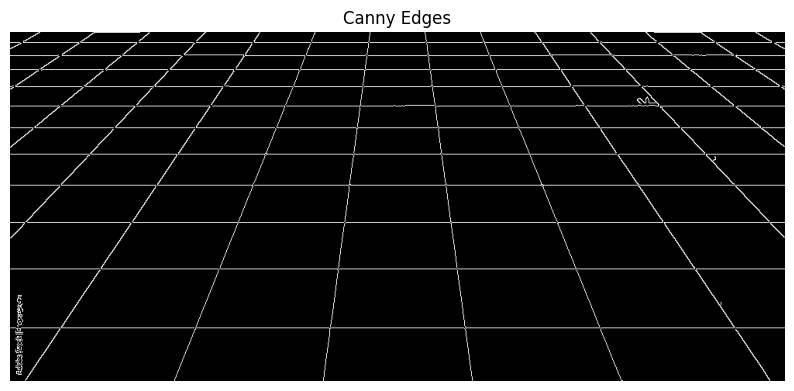

In [37]:
edges = cv2.Canny(gray, threshold1=50, threshold2=150)
ipynb_cv_imshow("Canny Edges", edges)

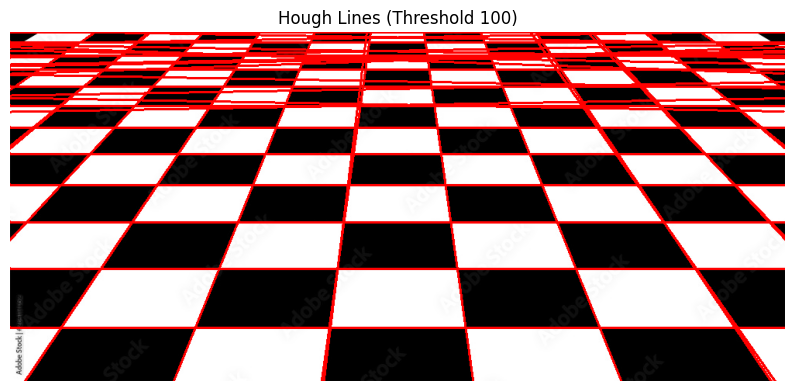

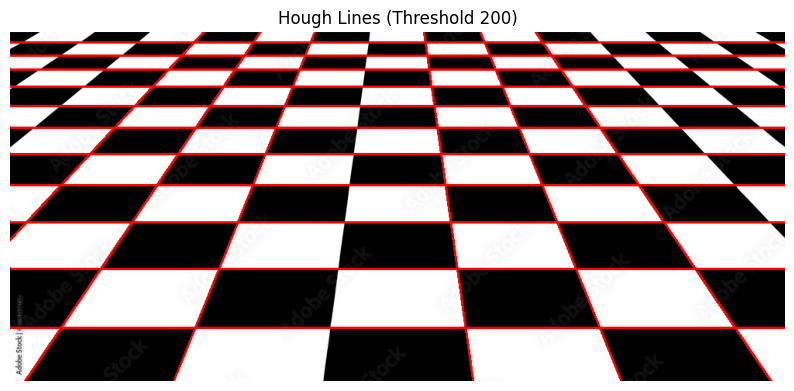

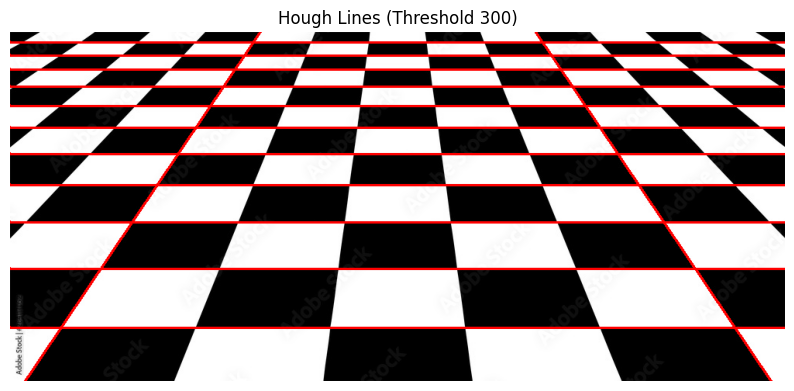

In [38]:
thresholds = [100, 200, 300]
for t in thresholds:
    lines = cv2.HoughLines(edges, 1, np.pi/180, t)
    out = img.copy()
    if lines is not None:
        for rho_theta in lines:
            rho, theta = rho_theta[0]
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a*rho, b*rho
            pt1 = (int(x0 + -b*1000), int(y0 + a*1000))
            pt2 = (int(x0 - -b*1000), int(y0 - a*1000))
            cv2.line(out, pt1, pt2, (0,0,255), 2)
    ipynb_cv_imshow(f"Hough Lines (Threshold {t})", out)

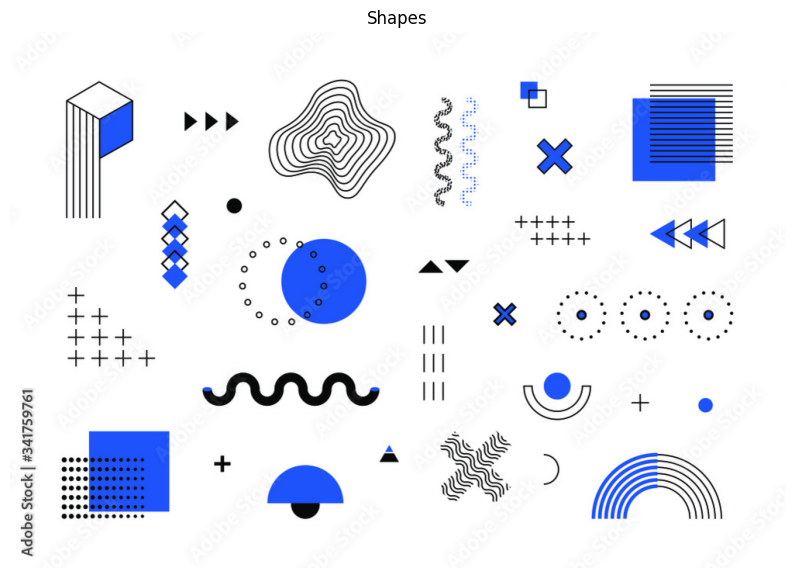

In [39]:
img_s = cv2.imread(os.path.join(script_dir, 'Shapes.jpg'))
ipynb_cv_imshow("Shapes", img_s)

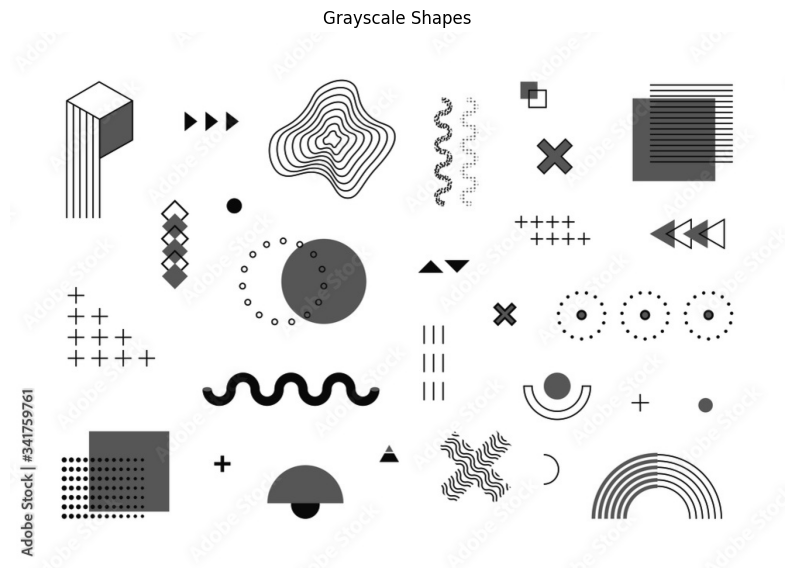

In [40]:
gray_s = cv2.cvtColor(img_s, cv2.COLOR_BGR2GRAY)
ipynb_cv_imshow("Grayscale Shapes", gray_s)

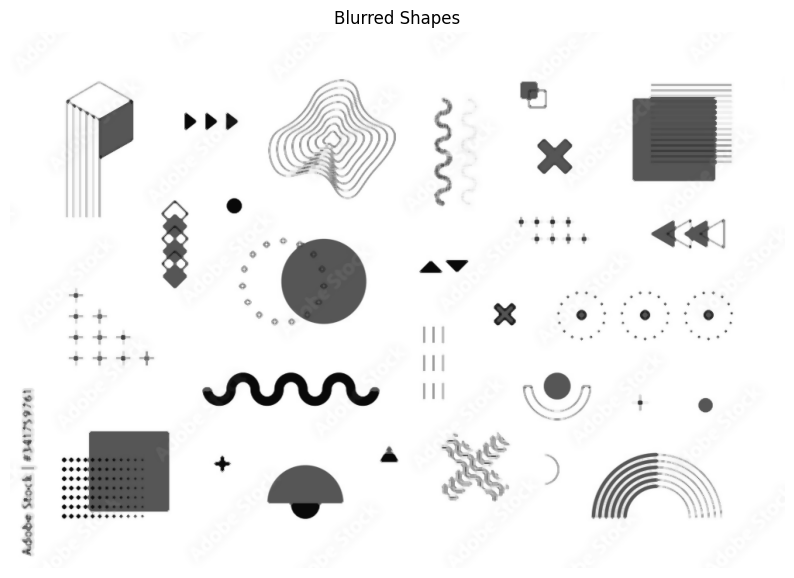

In [41]:
blur = cv2.medianBlur(gray_s, 5)
ipynb_cv_imshow("Blurred Shapes", blur)

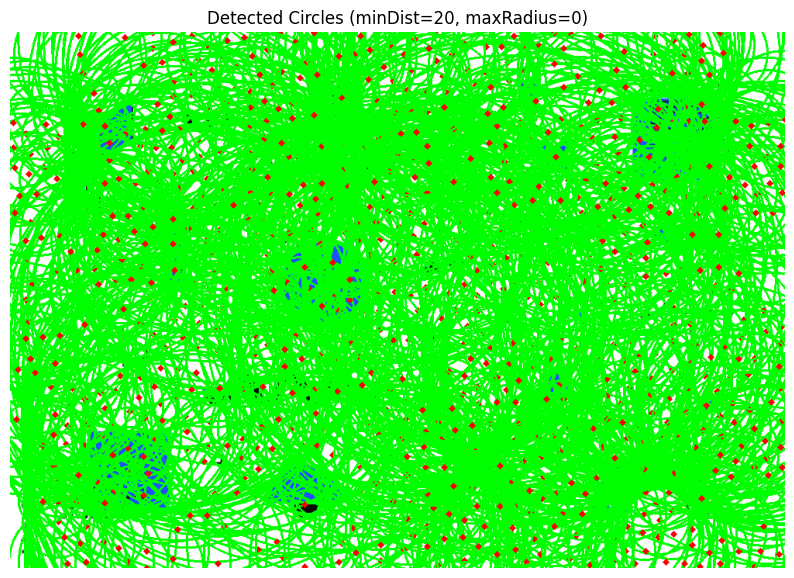

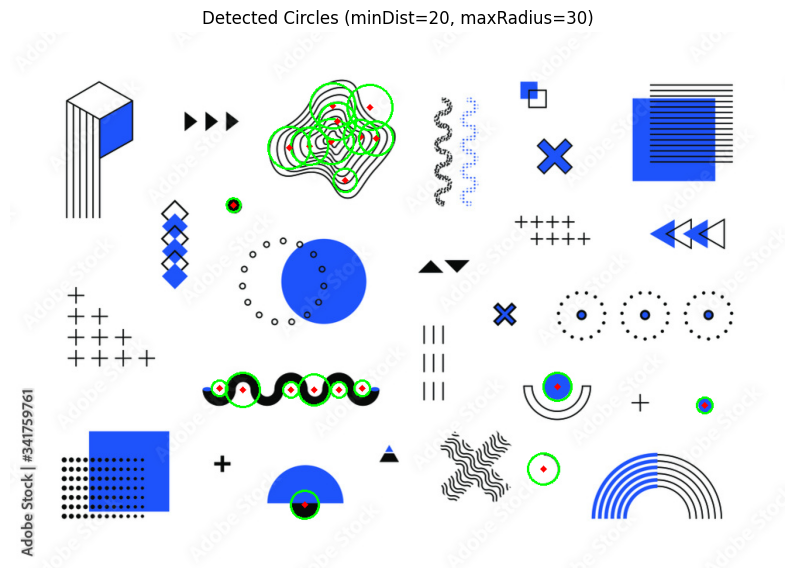

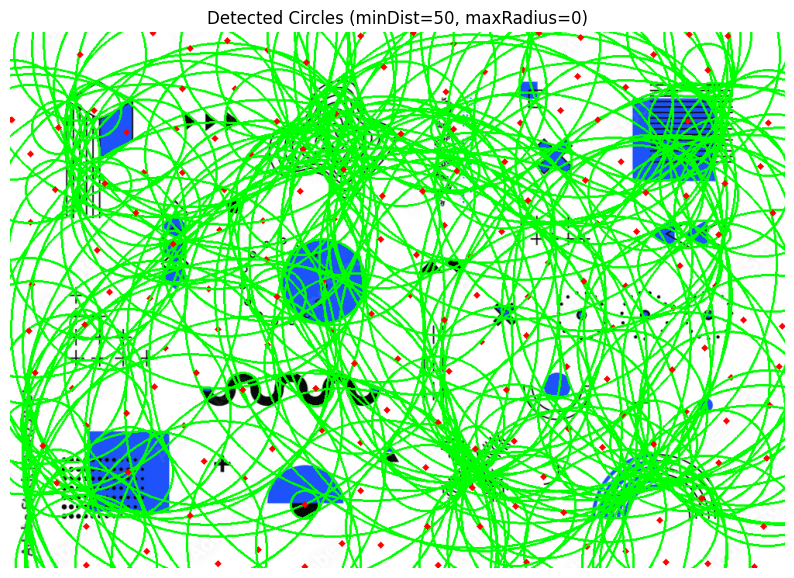

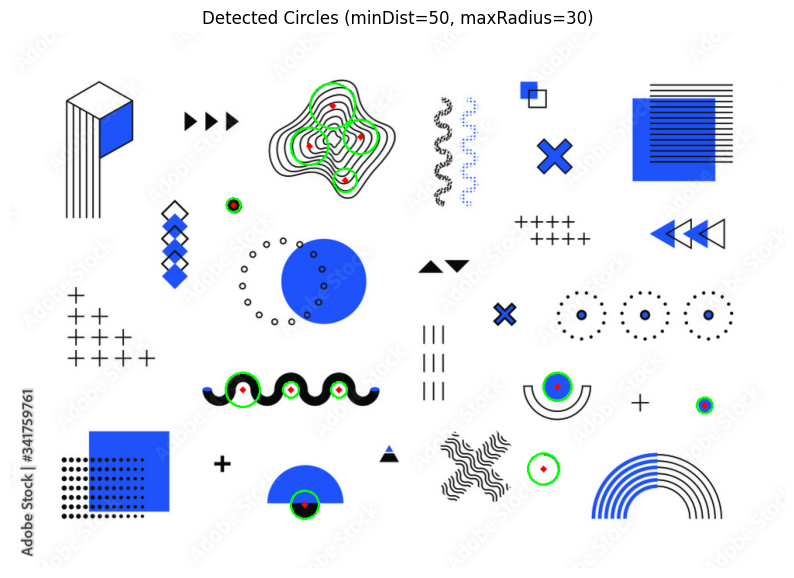

[{'minDist': 20, 'maxRadius': 0},
 {'minDist': 20, 'maxRadius': 30},
 {'minDist': 50, 'maxRadius': 0},
 {'minDist': 50, 'maxRadius': 30}]

In [42]:
# vary minDist and maxRadius
params_list = [
    {'minDist': 20, 'maxRadius': 0},
    {'minDist': 20, 'maxRadius': 30},
    {'minDist': 50, 'maxRadius': 0},
    {'minDist': 50, 'maxRadius': 30},
]
# import random
# params_list = [
#     {'minDist': random.choice([20, 50]), 'maxRadius': random.choice([0, 30])} 
#     for _ in range(4)
# ]
# print(params_list)

# plt.figure(figsize=(15, 10))
for p in params_list:
# for i, p in enumerate(params_list):
    circles = cv2.HoughCircles(
        blur,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=p['minDist'],
        param1=50,
        param2=30,
        minRadius=0,
        maxRadius=p['maxRadius']
    )
    # plt.subplot(2, 2, i+1)
    out = img_s.copy()
    if circles is not None:
        for x, y, r in np.uint16(np.around(circles[0])):
            cv2.circle(out, (x,y), r, (0,255,0), 2)
            cv2.circle(out, (x,y), 2, (0,0,255), 3)
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.title(f"minDist={p['minDist']}, maxRadius={p['maxRadius']}")
    # plt.axis('off')
    ipynb_cv_imshow(f"Detected Circles (minDist={p['minDist']}, maxRadius={p['maxRadius']})", out) # Remove this and Uncomment the Others to Put in
# plt.tight_layout()
# plt.show()

params_list